In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [4]:
y_train = pickle.load(open('Data/y_train.pkl', 'rb'))
y_test = pickle.load(open('Data/y_test.pkl', 'rb'))
y = pickle.load(open('Data/y.pkl', 'rb'))

# find the percentage of 1s in the training set
print('Percentage of 1s in the training set: ', y_train.sum()/len(y_train))

# find the percentage of 1s in the test set
print('Percentage of 1s in the test set: ', y_test.sum()/len(y_test))

# find the percentage of 1s in the whole dataset
print('Percentage of 1s in the whole dataset: ', y.sum()/len(y))

Percentage of 1s in the training set:  0.8054711246200608
Percentage of 1s in the test set:  0.8072289156626506
Percentage of 1s in the whole dataset:  0.8058252427184466


## Random Forest

In [21]:
all_dim_dict = pickle.load(open('Random Forest/rf_all_dim.pkl', 'rb'))
all_dim_dict

{'Model': RandomForestClassifier(min_samples_leaf=5, n_estimators=200, random_state=42),
 'Best Parameters': {'max_depth': None,
  'min_samples_leaf': 5,
  'min_samples_split': 2,
  'n_estimators': 200},
 'Training Set Accuracy': 0.9331943286071726,
 'Test Set Accuracy': 0.9036144578313253,
 'AUC Score': 0.7975746268656716}

In [22]:
pca_res = pd.read_csv('Random Forest/pca_rf_results.csv')
pca_res.head()

,n_components,train_accuracy,test_accuracy,auc_score
0,10,0.936225,0.939759,0.891325
1,11,0.930136,0.927711,0.860075
2,12,0.936225,0.939759,0.891325
3,13,0.936225,0.915663,0.828825
4,14,0.939227,0.915663,0.852612


In [23]:
best_auc = pca_res.loc[pca_res['auc_score'].idxmax()]
best_auc

n_components      10.000000
train_accuracy     0.936225
test_accuracy      0.939759
auc_score          0.891325
Name: 0, dtype: float64

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bounding_box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  # This is added back by InteractiveShellApp.init_path()


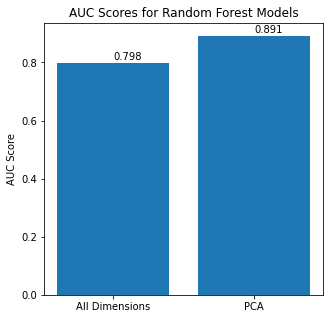

In [24]:
all_dim_auc = all_dim_dict['AUC Score']
pca_auc = best_auc['auc_score']

# plot these in a bar chart
plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA'], [all_dim_auc, pca_auc])
plt.text(0, all_dim_auc + 0.01, str(round(all_dim_auc, 3)))
plt.text(1, pca_auc + 0.01, str(round(pca_auc, 3)))
plt.ylabel('AUC Score')
plt.title('AUC Scores for Random Forest Models')
plt.savefig('Random Forest/rf_auc_scores.jpg', bounding_box_inches='tight')
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bounding_box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  # Remove the CWD from sys.path while we load stuff.


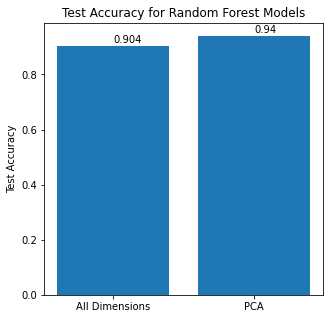

In [25]:
all_dim_acc = all_dim_dict['Test Set Accuracy']
pca_acc = best_auc['test_accuracy']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA'], [all_dim_acc, pca_acc])
plt.text(0, all_dim_acc + 0.01, str(round(all_dim_acc, 3)))
plt.text(1, pca_acc + 0.01, str(round(pca_acc, 3)))
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Random Forest Models')
plt.savefig('Random Forest/rf_test_acc.jpg', bounding_box_inches='tight')
plt.show()

## SVM

In [26]:
svm_all_dim = pickle.load(open('SVM/svm_all_dim.pkl', 'rb'))
svm_all_dim

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\base.py:338: UserWarning: Trying to unpickle estimator SVC from version 1.3.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,


{'Model': SVC(C=0.1, kernel='linear', probability=True),
 'Best Parameters': {'C': 0.1, 'kernel': 'linear'},
 'Training Set Accuracy': 0.9392549346677788,
 'Test Set Accuracy': 0.927710843373494,
 'AUC Score': 0.8600746268656717}

In [27]:
svm_pca = pickle.load(open('SVM/SVM_PCA.pkl', 'rb'))
svm_pca

{'Model': SVC(C=0.1, kernel='linear', probability=True),
 'n_components': 10,
 'x_train': array([[116.53524568,  66.57877678,   4.0396317 , ..., -35.06401713,
           2.58651888, -29.28104064],
        [ 39.71820548,  27.67998357,  46.0255223 , ...,  -2.43456483,
           0.32915606, -16.75231861],
        [-63.78854907, -18.16156415, -49.86556805, ..., -13.69656203,
         -17.84698321,   7.05768881],
        ...,
        [ 50.99864502, -74.38551038,  31.94927654, ...,   1.37731404,
          -3.9919928 ,  -1.36908049],
        [ 33.44141763,  28.01431284,  47.27643285, ..., -31.85363024,
          -8.8192729 , -10.19399496],
        [  7.01885766, -35.9333745 ,  10.9327366 , ..., -18.7638029 ,
           2.93958801, -29.49426766]]),
 'x_test': array([[-3.20073618e+01,  5.66934113e+00, -4.41900676e+01,
         -2.36503004e+01,  9.76436005e+00, -1.87623195e+01,
          4.25219582e+00, -4.27556064e+00,  1.09529987e+01,
          9.35176731e+00],
        [-4.78802804e+01,  1.81

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bounding_box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  # Remove the CWD from sys.path while we load stuff.


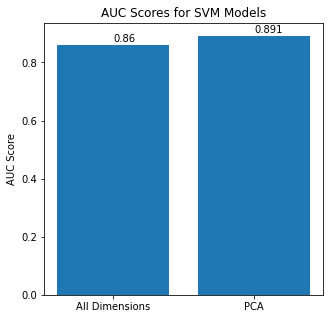

In [28]:
all_dim_auc = svm_all_dim['AUC Score']
pca_auc = 0.891325

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA'], [all_dim_auc, pca_auc])
plt.text(0, all_dim_auc + 0.01, str(round(all_dim_auc, 3)))
plt.text(1, pca_auc + 0.01, str(round(pca_auc, 3)))
plt.ylabel('AUC Score')
plt.title('AUC Scores for SVM Models')
plt.savefig('SVM/svm_auc_scores.jpg', bounding_box_inches='tight')
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bounding_box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  # Remove the CWD from sys.path while we load stuff.


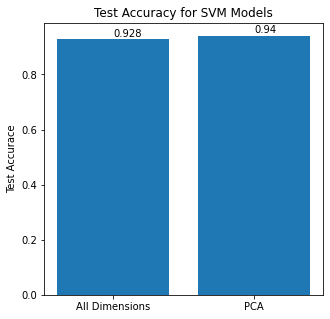

In [29]:
all_dim_acc = svm_all_dim['Test Set Accuracy']
pca_acc = 0.939759

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA'], [all_dim_acc, pca_acc])
plt.text(0, all_dim_acc + 0.01, str(round(all_dim_acc, 3)))
plt.text(1, pca_acc + 0.01, str(round(pca_acc, 3)))
plt.ylabel('Test Accurace')
plt.title('Test Accuracy for SVM Models')
plt.savefig('SVM/svm_acc_scores.jpg', bounding_box_inches='tight')
plt.show()

## AdaBoost

In [30]:
all_dim_dict = pickle.load(open('Adaboost/adaboost_all_dim.pkl', 'rb'))
all_dim_dict

{'Model': AdaBoostClassifier(n_estimators=200, random_state=42),
 'Best Parameters': {'learning_rate': 1.0, 'n_estimators': 200},
 'Training Set Accuracy': 0.9453433416736169,
 'Test Set Accuracy': 0.927710843373494,
 'AUC Score': 0.8838619402985075}

In [31]:
adaboost_pca = pickle.load(open('Adaboost/adaboost_PCA.pkl', 'rb'))
adaboost_pca

{'Model': AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42),
 'n_components': 11,
 'x_train': array([[ -1.60164246,  80.26061605,  92.53210386, ..., -25.93685497,
         -29.01502619, -17.94426104],
        [ -1.44790999, -10.00248372,  76.51764749, ..., -11.75492592,
          -5.45182645, -19.23885749],
        [-36.65433714,   1.39282575, -81.05119127, ...,  -6.21478364,
          -8.81749871, -11.88653957],
        ...,
        [118.13111884, -30.35089492,  15.40632602, ..., -20.1321586 ,
          35.31445158, -11.45783272],
        [-19.68740623,  -8.70935296,  56.1425256 , ..., -34.68590438,
          24.02407216, -34.82947235],
        [ 41.91168263, -21.76418395, -15.20395106, ..., -30.49528776,
          -1.48308213, -10.19036445]]),
 'x_test': array([[-2.27972020e+01,  2.01085187e+01, -4.20448762e+01,
          1.58326911e+01, -1.38904966e+00, -1.55327479e+01,
          2.61392186e+01, -7.65621129e+00,  1.81276461e+01,
          1.82919775e+00, -1.67

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bounding_box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  # Remove the CWD from sys.path while we load stuff.


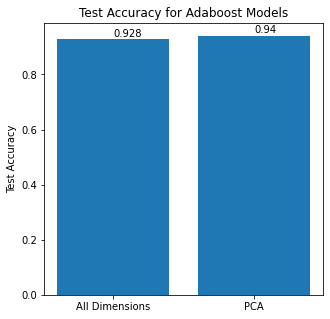

In [32]:
all_dim_acc = all_dim_dict['Test Set Accuracy']
pca_acc = adaboost_pca['Test Accuracy']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA'], [all_dim_acc, pca_acc])
plt.text(0, all_dim_acc + 0.01, str(round(all_dim_acc, 3)))
plt.text(1, pca_acc + 0.01, str(round(pca_acc, 3)))
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Adaboost Models')
plt.savefig('Adaboost/adaboost_acc_scores.jpg', bounding_box_inches='tight')
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bounding_box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  # Remove the CWD from sys.path while we load stuff.


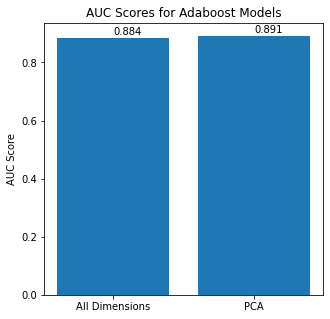

In [34]:
all_dim_auc = all_dim_dict['AUC Score']
pca_auc = adaboost_pca['AUC_score']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA'], [all_dim_auc, pca_auc])
plt.text(0, all_dim_auc + 0.01, str(round(all_dim_auc, 3)))
plt.text(1, pca_auc + 0.01, str(round(pca_auc, 3)))
plt.ylabel('AUC Score')
plt.title('AUC Scores for Adaboost Models')
plt.savefig('Adaboost/adaboost_auc_scores.jpg', bounding_box_inches='tight')
plt.show()

## Deep Learning Model

In [36]:
dl_all_dim = pd.read_csv('DL model/all_dim_results.csv')
dl_all_dim.head()

,epochs,lr,batch_size,acc,auc
0,5,0.001,16,0.903614,0.845149
1,5,0.001,32,0.915663,0.876399
2,5,0.001,64,0.927711,0.931437
3,5,0.001,128,0.903614,0.892724
4,5,0.010,16,0.903614,0.892724


In [38]:
dl_pca = pd.read_csv('DL model/PCA_DL_results.csv')
dl_pca.head()

,n_components,train_accuracy,test_accuracy,auc_score
0,5,0.981763,0.891566,0.837687
1,10,0.996960,0.891566,0.837687
2,20,0.996960,0.903614,0.868937
3,50,1.000000,0.903614,0.892724
4,100,1.000000,0.927711,0.931437


In [40]:
all_dim_best_auc = dl_all_dim.loc[dl_all_dim['auc'].idxmax()]
all_dim_best_auc

epochs        10.000000
lr             0.100000
batch_size    16.000000
acc            0.927711
auc            0.955224
Name: 20, dtype: float64

In [41]:
pca_best_auc = dl_pca.loc[dl_pca['auc_score'].idxmax()]
pca_best_auc

n_components      300.000000
train_accuracy      1.000000
test_accuracy       0.963855
auc_score           0.977612
Name: 6, dtype: float64

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bounding_box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  # Remove the CWD from sys.path while we load stuff.


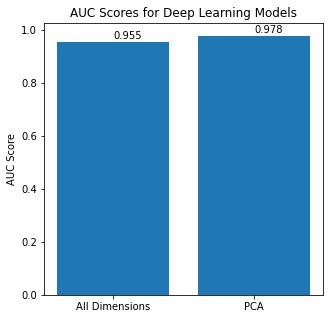

In [42]:
all_dim_auc = all_dim_best_auc['auc']
pca_auc = pca_best_auc['auc_score']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA'], [all_dim_auc, pca_auc])
plt.text(0, all_dim_auc + 0.01, str(round(all_dim_auc, 3)))
plt.text(1, pca_auc + 0.01, str(round(pca_auc, 3)))
plt.ylabel('AUC Score')
plt.title('AUC Scores for Deep Learning Models')
plt.savefig('DL model/dl_auc_scores.jpg', bounding_box_inches='tight')
plt.show()

c:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bounding_box_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  # Remove the CWD from sys.path while we load stuff.


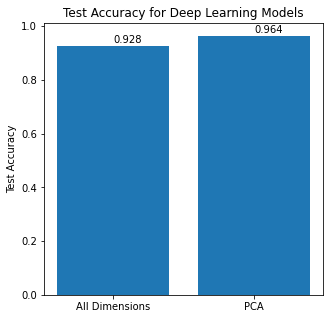

In [43]:
all_dim_acc = all_dim_best_auc['acc']
pca_acc = pca_best_auc['test_accuracy']

plt.figure(figsize=(5, 5))
plt.bar(['All Dimensions', 'PCA'], [all_dim_acc, pca_acc])
plt.text(0, all_dim_acc + 0.01, str(round(all_dim_acc, 3)))
plt.text(1, pca_acc + 0.01, str(round(pca_acc, 3)))
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Deep Learning Models')
plt.savefig('DL model/dl_acc_scores.jpg', bounding_box_inches='tight')
plt.show()